# Random Projections Example

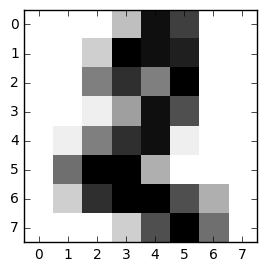

In [1]:
from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(4, figsize=(3, 3))
plt.imshow(digits.images[2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [2]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/Users/crovella/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
accuracies = []
components = np.int32(np.linspace(2, 64, 20))

In [4]:
digits = datasets.load_digits()
split = train_test_split(digits.data, digits.target, test_size = 0.3,
    random_state = 42)
(trainData, testData, trainTarget, testTarget) = split

In [6]:
#model = tree.DecisionTreeClassifier()
#model.fit(trainData, trainTarget)

model = KNeighborsClassifier()
model.fit(trainData, trainTarget)

#model = LinearSVC()
#model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)
baseline

0.99259259259259258

In [7]:


# loop over the projection sizes
for comp in components:
    # create the random projection
    sp = SparseRandomProjection(n_components = comp)
    X = sp.fit_transform(trainData)
    #print X.shape
 
    # train a classifier on the sparse random projection
    #model = tree.DecisionTreeClassifier()
    #model = LinearSVC()
    model = KNeighborsClassifier()
    model.fit(X, trainTarget)
 
    # evaluate the model and update the list of accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

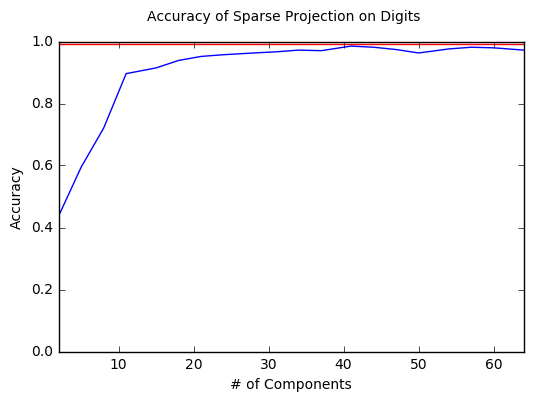

In [8]:
# create the figure
plt.figure()
plt.suptitle("Accuracy of Sparse Projection on Digits")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
plt.xlim([2, 64])
plt.ylim([0, 1.0])
 
# plot the baseline and random projection accuracies
plt.plot(components, [baseline] * len(accuracies), color = "r")
plt.plot(components, accuracies)

plt.show()